In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,500,200)

Vizualize data

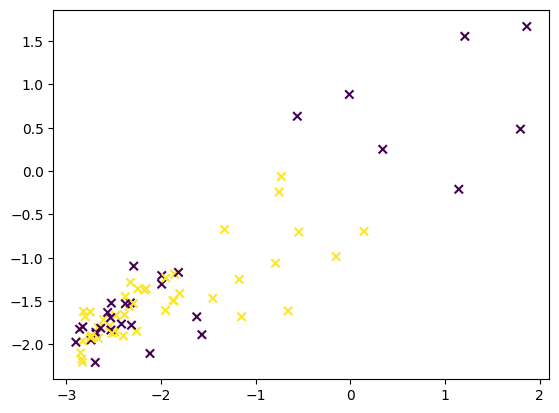

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(10,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_15052\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
2/2 [==============================] - 1s 9ms/step - loss: 0.2565 - accuracy: 0.5667
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 0.5667
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.5667
Epoch 4/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.5667
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.5667
Epoch 6/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2456 - accuracy: 0.5667
Epoch 7/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2437 - accuracy: 0.5667
Epoch 8/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2416 - accuracy: 0.5667
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.5667
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.5667
Epoch 11/15
2/2 [======================

1/1 [==============================] - 0s 111ms/step - loss: 0.2871 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2762 - accuracy: 0.5333
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2686 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2640 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.5667
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2570 - accuracy: 0.5667
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.4745 - accuracy: 0.2500
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3261 - accuracy: 0.3833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.4000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.4000
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.6000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.6167
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2650 - accuracy: 0.6167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.6167
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 8ms/step - loss: 0.2704 - accuracy: 0.5167
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2689 - accuracy: 0.5333
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2675 - accuracy: 0.5333
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.5333
Epoch 12/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2643 - accuracy: 0.5333
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.5333
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.5333
Epoch 15/15
1/1 [==============================] - 0s 147ms/step - loss: 0.2701 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2267 - accuracy: 0.6500
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.6333
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.4167
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3183 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3064 - accuracy: 0.2500
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2963 - accuracy: 0.5167
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2943 - accuracy: 0.5667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.5667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2891 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.5167
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.5167
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2827 - accuracy: 0.5167
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.5167
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.5167
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.5167
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5167
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.5167
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5167
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.4667
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 0.4667
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.4667
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3492 - accuracy: 0.4667
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.4667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.4667
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.4667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.4500
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2703 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.4833
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.6500
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2181 - accuracy: 0.6500
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2170 - accuracy: 0.6500
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2769 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3521 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.4000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.4167
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.4167
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.3667
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.3667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.3667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3848 - accuracy: 0.3667
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3822 - accuracy: 0.3667
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3796 - accuracy: 0.3667
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.3667
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3742 - accuracy: 0.3667
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.3667
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.3667
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.6667
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.6667
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.6667
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.6667
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2222 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2208 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.6667
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2182 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2169 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 162ms/step - loss: 0.2574 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2725 - accuracy: 0.6167
Epoch 12/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.6167
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.6167
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.6167
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.3175 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2541 - accuracy: 0.5333
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.5167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.5333
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5333
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.5333
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 144ms/step - loss: 0.3825 - accuracy: 0.2500
Epoch 1/15
2/2 [==============================] - 1s 8ms/step - loss: 0.2271 - accuracy: 0.6167
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.6167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2230 - accuracy: 0.6167
Epoch 4/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2212 - accuracy: 0.6167
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.6167
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.6333
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2155 - accuracy: 0.6333
Epoch 8/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2137 - accuracy: 0.6500
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2118 - accuracy: 0.6667
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.4833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.4833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.4833
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3347 - accuracy: 0.4833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.4833
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.4833
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3277 - accuracy: 0.5167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.5167
Epoch 13/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.5167
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.5333
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.6500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2137 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.6667
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.1838 - accuracy: 0.8125
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.5333
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.5333
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.5500
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 114ms/step - loss: 0.1895 - accuracy: 0.7500
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.4833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.4833
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.4833
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.4833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.4833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.4833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.4833
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.4833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.4833
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.4000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.4167
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.4167
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.4333
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.4333
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.4333
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2569 - accuracy: 0.5667
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.5667
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.5667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.5667
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.5667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.5667
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2002 - accuracy: 0.8125
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.5667
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2635 - accuracy: 0.5667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.5667
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.6500
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2895 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.3667
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.3667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.3667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.3833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3558 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3534 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.4333
Epoch 9/15
2/2 [==============================] 

In [12]:
dwt_test_classifiers(1,'db1',time_config)

Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.6167
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.6167
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2593 - accuracy: 0.6167
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2579 - accuracy: 0.6167
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2569 - accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.6167
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.6167
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.6333
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.6333
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2515 - accuracy: 0.6333
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.4333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3491 - accuracy: 0.4333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.4333
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.4333
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3437 - accuracy: 0.4333
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.4333
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.4333
Epoch 13/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.4333
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 0.4333
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.4397 - accuracy: 0.2500
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3421 - accuracy: 0.4000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.4000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.4000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3086 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.4667
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.4667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.4667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.4833
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.4833
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 111ms/step - loss: 0.2775 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.4833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.5167
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.5333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.6333
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.6333
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2353 - accuracy: 0.6333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.6333
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.6333
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2326 - accuracy: 0.6333
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 0.6333
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.6333
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.6333
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.6333
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.6000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.6000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2327 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2717 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.3833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.3833
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.3833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4066 - accuracy: 0.3833
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 136ms/step - loss: 0.3142 - accuracy: 0.5625
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.4833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.4833
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.4833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3361 - accuracy: 0.4833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.4833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3306 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.6167
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.6167
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.6167
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.6167
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.6167
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.6167
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.6167
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.6167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.6167
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.6167
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.6833
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.6833
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.7167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.7167
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.7167
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.7167
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2805 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3231 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 0.4000
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2690 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2540 - accuracy: 0.5625
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2696 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2674 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.5167
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.5167
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.5333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5333
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2561 - accuracy: 0.5333
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.4667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.4667
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.4667
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.4667
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.4667
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.4667
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.4833
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.4833
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3114 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.1967 - accuracy: 0.7167
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1944 - accuracy: 0.7167
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.7333
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.7333
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1874 - accuracy: 0.7333
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1852 - accuracy: 0.7500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2956 - accuracy: 0.3750
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3336 - accuracy: 0.4833
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.4833
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.4167
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.3153 - accuracy: 0.3125
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2083 - accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2059 - accuracy: 0.6833
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2040 - accuracy: 0.6833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.6833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.6833
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.7000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.7000
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.4667
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.4667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.4667
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3836 - accuracy: 0.4667
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.4667
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.4667
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3768 - accuracy: 0.4667
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.4667
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3720 - accuracy: 0.4667
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.4667
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.6000
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.6167
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.6167
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.6167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2338 - accuracy: 0.6167
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.6167
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2309 - accuracy: 0.6167
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2648 - accuracy: 0.6250
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3048 - accuracy: 0.4667
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.5833
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.5833
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 128ms/step - loss: 0.2796 - accuracy: 0.4375
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2540 - accuracy: 0.5500
Epoch 2/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2514 - accuracy: 0.5667
Epoch 3/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2491 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3118 - accuracy: 0.5167
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.5167
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3073 - accuracy: 0.5167
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.5167
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3034 - accuracy: 0.5167
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.5333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2955 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 7ms/step - loss: 0.3230 - accuracy: 0.4333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.4333
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.4333
Epoch 9/15
2/2 [==============================] - 0s 8ms/step - loss: 0.3165 - accuracy: 0.4333
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3143 - accuracy: 0.4333
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3123 - accuracy: 0.4333
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.4333
Epoch 13/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3080 - accuracy: 0.4333
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3058 - accuracy: 0.4333
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.3385 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.3667
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.3667
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.3667
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3732 - accuracy: 0.3667
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3999 - accuracy: 0.1250
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.2400 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.6167
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.6167
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.6167
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2352 - accuracy: 0.6167
Epoch 6/15
2/2 [=============================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,500,200)

In [14]:
csp_test_classifiers(2,time_config, 60, 35)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.2812 - accuracy: 0.4600
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.4600
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2792 - accuracy: 0.4600
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.4600
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.4600
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2764 - accuracy: 0.4600
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2754 - accuracy: 0.4600
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2745 - accuracy: 0.4600
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.4600
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.4800
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.2600 - accuracy: 0.5200
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.5200
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.5200
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.5200
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.5200
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.5200
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2558 - accuracy: 0.5200
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.5200
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2416 - accuracy: 0.6154
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.5200
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.5200
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.5200
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2631 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.5400
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.5400
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.5400
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2968 - accuracy: 0.5400
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.5400
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 115ms/step - loss: 0.3701 - accuracy: 0.0769
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.5400
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.5400
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.5400
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.5400
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.5400
Epoch 6/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.5400
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.5400
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.5400
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.5600
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2739 - accuracy: 0.5600
Epoch 7/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2737 - accuracy: 0.5600
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2735 - accuracy: 0.5400
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2731 - accuracy: 0.5600
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.5600
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.5600
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.5600
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.5600
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2356 - accuracy: 0.5600
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2353 - accuracy: 0.5600
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.5800
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.5800
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2342 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2361 - accuracy: 0.4615
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3173 - accuracy: 0.4600
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.4600
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3148 - accuracy: 0.4600
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.4600
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 128ms/step - loss: 0.2626 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2945 - accuracy: 0.4400
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.5400
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.5400
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.5400
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.5400
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2922 - accuracy: 0.5400
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2918 - accuracy: 0.5400
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.5400
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.5400
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.5600
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.5600
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.5600
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.5600
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.5600
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2722 - accuracy: 0.5600
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.5600
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.5600
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.5600
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.5400
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.5400
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2365 - accuracy: 0.5200
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2360 - accuracy: 0.5400
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.5400
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 139ms/step - loss: 0.2595 - accuracy: 0.3846
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.1932 - accuracy: 0.7200
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.7200
Epoch 3/15
2/2 [==============================] - 0s 8ms/step - loss: 0.1917 - accuracy: 0.7200
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 134ms/step - loss: 0.2739 - accuracy: 0.3846
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2520 - accuracy: 0.5200
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.5200
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.5200
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.5200
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5200
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.5200
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.5200
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.5200
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 8ms/step - loss: 0.2883 - accuracy: 0.5600
Epoch 4/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2878 - accuracy: 0.5600
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2873 - accuracy: 0.5600
Epoch 6/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2869 - accuracy: 0.5600
Epoch 7/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2865 - accuracy: 0.5600
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2860 - accuracy: 0.5600
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2856 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.5600
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.5600
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2844 - accuracy: 0.5600
Epoch 13/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.4400
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.4400
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.4400
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.4400
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.4400
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.4600
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.4600
Epoch 15/15
1/1 [==============================] - 0s 155ms/step - loss: 0.2702 - accuracy: 0.3846
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3334 - accuracy: 0.4200
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.3800
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2466 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 128ms/step - loss: 0.2427 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2734 - accuracy: 0.4400
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.4400
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.4200
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.4200
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.4200
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.4200
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.4200
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.4400
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.4400
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.4200
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.4200
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.4200
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.4200
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.4200
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.4200
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.4200
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.4200
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.4800
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2659 - accuracy: 0.4800
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2651 - accuracy: 0.4800
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.4800
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.4800
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.4800
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2622 - accuracy: 0.4800
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2615 - accuracy: 0.4800
Epoch 15/15
1/1 [==============================] - 0s 178ms/step - loss: 0.2988 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2611 - accuracy: 0.5800
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.4000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.3800
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.3800
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2367 - accuracy: 0.6923
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.4000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.4200
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.2608 - accuracy: 0.3600
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.3600
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.3600
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.3600
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.3600
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.3600
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.3600
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.3600
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.3600
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2584 - accuracy: 0.3600
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.5400
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.5400
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.5400
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.5400
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.5400
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.5400
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.5400
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3081 - accuracy: 0.5400
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2836 - accuracy: 0.4615
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 7ms/step - loss: 0.2992 - accuracy: 0.4400
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.4400
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.4400
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2958 - accuracy: 0.4400
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.4497 - accuracy: 0.3846
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2492 - accuracy: 0.6000
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.6000
Epoch 6/15
2/2 [=============================

In [15]:
dwt_test_classifiers(3,'db3',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2903 - accuracy: 0.5400
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2879 - accuracy: 0.5600
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.5600
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.5600
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.5600
Epoch 6/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2797 - accuracy: 0.5600
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.5600
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2760 - accuracy: 0.5600
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.5800
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.2925 - accuracy: 0.5400
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2906 - accuracy: 0.5400
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2891 - accuracy: 0.5400
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.5400
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2859 - accuracy: 0.5400
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2844 - accuracy: 0.5400
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.5400
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2813 - accuracy: 0.5400
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2796 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.2248 - accuracy: 0.6923
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2784 - accuracy: 0.5600
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.5600
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.5600
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2739 - accuracy: 0.5600
Epoch 15/15
1/1 [==============================] - 0s 144ms/step - loss: 0.2456 - accuracy: 0.6923
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2440 - accuracy: 0.5800
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.5800
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.5800
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.5800
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.5800
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 157ms/step - loss: 0.2276 - accuracy: 0.7692
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3012 - accuracy: 0.5600
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.5600
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2976 - accuracy: 0.5600
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.5600
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.5600
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.5600
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.5800
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2900 - accuracy: 0.5800
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.5800
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.5800
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.5800
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.5800
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.5800
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.5800
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5800
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2482 - accuracy: 0.5800
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.5800
Epoch 13/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2459 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2447 - accuracy: 0.6200
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2341 - accuracy: 0.6000
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2324 - accuracy: 0.6000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.6000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2342 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2766 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.5000
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 119ms/step - loss: 0.2918 - accuracy: 0.6154
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2889 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.5200
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.5200
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.5200
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2777 - accuracy: 0.5600
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.5600
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.5600
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2945 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2926 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 11ms/step - loss: 0.2908 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2889 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2854 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2802 - accuracy: 0.5000
Epoch 14/15
2/2 [============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.5400
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2579 - accuracy: 0.5400
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.5400
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.5400
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.5400
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2751 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3065 - accuracy: 0.5200
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.5200
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3028 - accuracy: 0.5200
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3154 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 173ms/step - loss: 0.4097 - accuracy: 0.3846
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3243 - accuracy: 0.4400
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.4400
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.4400
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3183 - accuracy: 0.4600
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.4600
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.4600
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.4600
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.4600
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.4400
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.4600
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.4600
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.4600
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.4600
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.4600
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.4600
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.4600
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.4600
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.4800
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 6ms/step - loss: 0.2064 - accuracy: 0.6200
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.6200
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2046 - accuracy: 0.6200
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.6200
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.6200
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2009 - accuracy: 0.6200
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.2284 - accuracy: 0.4615
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2221 - accuracy: 0.6800
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.6800
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.5200
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 134ms/step - loss: 0.2954 - accuracy: 0.4615
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3222 - accuracy: 0.4400
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3200 - accuracy: 0.4400
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.4400
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.4400
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.4400
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.4400
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.4400
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2393 - accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.6000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2332 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.6000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.6200
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.6200
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.6200
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.3600
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.3600
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.3600
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3446 - accuracy: 0.3600
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.3600
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.3600
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3390 - accuracy: 0.3600
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3371 - accuracy: 0.3600
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2738 - accuracy: 0.6154
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2324 - accuracy: 0.6800
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2791 - accuracy: 0.4400
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2780 - accuracy: 0.4400
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.4400
Epoch 15/15
1/1 [==============================] - 0s 160ms/step - loss: 0.3138 - accuracy: 0.3077
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2752 - accuracy: 0.5600
Epoch 2/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2733 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.6200
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.6200
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.6200
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.6200
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 6ms/step - loss: 0.2869 - accuracy: 0.5600
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2850 - accuracy: 0.5600
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.5800
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2799 - accuracy: 0.6200
Epoch 6/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2782 - accuracy: 0.6200
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2766 - accuracy: 0.6200
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2751 - accuracy: 0.6200
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2734 - accuracy: 0.6200
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.6400
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.5200
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.5200
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2812 - accuracy: 0.5200
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2787 - accuracy: 0.5200
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2765 - accuracy: 0.5400
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.5400
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.5400
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.5400
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2675 - accuracy: 0.5400
Epoch 15/15
1/1 [==============================] - 0s 152ms/step - loss: 0.2471 - accuracy: 0.6154
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.6200
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2451 - accuracy: 0.6200
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2439 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2428 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 184ms/step - loss: 0.2342 - accuracy: 0.5385
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3070 - accuracy: 0.5000
Epoch 6/15
2/2 [=============================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
